In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
date_parser = lambda x: pd.datetime.strptime('190' + x, '%Y-%m')
time_series_data = pd.read_csv('../datasets/sales-of-shampoo.csv', header=0, index_col=0, parse_dates=['Month'], date_parser=date_parser, squeeze= True)


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64


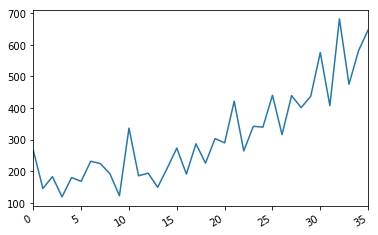

In [3]:
print(time_series_data.head())
time_series_data.plot(use_index=False)
plt.show()

In [8]:
# time_series_data = pd.read_csv('../datasets/sales-of-shampoo.csv', index_col=0, parse_dates=['Month'], date_parser=date_parser, squeeze= True)
# time_series_data.columns = ['date', 'sales'] -> doesn't work with index_col set
# print(time_series_data.head(3))

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
Name: Sales of shampoo over a three year period, dtype: float64


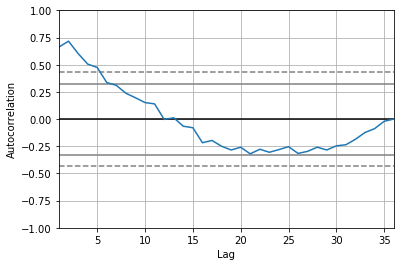

In [7]:
# auto correlation plot
pd.plotting.autocorrelation_plot(time_series_data)
plt.show()

In [10]:
# arima maodel
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
# print(np.asarray(time_series_data))
# print(type(time_series_data))
model = ARIMA(np.asarray(time_series_data), order=(5,1,0)) # 5 - autoregression, 1 - difference order, 0 - moving average window
model_fit = model.fit() # disp=0 to not display the details of fitting
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Tue, 14 Aug 2018   AIC                            406.340
Time:                        13:16:49   BIC                            417.227
Sample:                             1   HQIC                           410.098
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.y     -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.y     -0.6203      0.282     -2.203      0.0

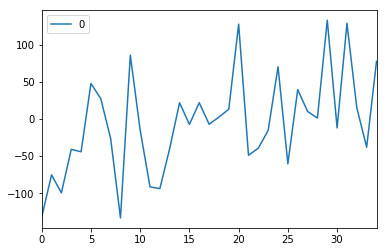

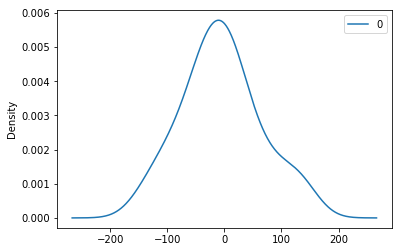

                0
count   35.000000
mean    -5.495253
std     68.132879
min   -133.296645
25%    -42.477921
50%     -7.186628
75%     24.748305
max    133.237946


In [11]:
# plot residual errors
residuals =  pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

# plot density function
residuals.plot(kind='kde')
plt.show()

# residuals summary
print(residuals.describe())

In [12]:
# forecast - one step forecasting - index 0: value predicted
print(model_fit.forecast())

# from sklearn.metrcs import mean_squared_error
# mean_squared_error(test, predictions)

(array([ 564.21368287]), array([ 64.2414213]), array([[ 438.3028108 ,  690.12455494]]))
